#### **Universidade Federal da Bahia.**
#### **Departamento de Eng. Elétrica e Computação**
#### **Avaliação 4 - Introdução ao Aprendizado de Máquina**
#### Semestre: 2023.2
#### Alunos : Ricardo Machado e Rodrigo Pimentel

Resumo: Este trabalho consiste na análise de um banco de dados contendo informações médicas de 918 pacientes, com o objetivo de prever o diagnóstico de doenças cardíacas em indivíduos. A árvore de decisão é utilizada para realizar a tarefa de classificação e a acurácia obtida com validação cruzada para o modelo otimizado é de 85,20%.

### Questão 1: Escolha uma tarefa de classificação que possa ser abordada utilizando Árvores de Decisão. Selecione um banco de dados adequado (sugestões em https://archive.ics.uci.edu/). Projete, treine a árvore e avalie.



In [1]:
#Importação de bibliotecas utilizadas no trabalho.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, mean_squared_error, classification_report
from sklearn import metrics

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [8, 6]

#### Carregamento do banco de dados.

O [banco de dados](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) utilizado contém 918 instâncias, incluindo informações sobre pacientes saudáveis e pacientes com doenças cardíacas.

Os atributos preditivos do conjunto de dados são: idade do paciente, sexo do paciente, tipo de dor no peito, pressão arterial em repouso, colesterol, resultados do eletrocardiograma(ecg) em repouso, frequência cardíaca máxima, angina induzida por exercício, pico e inclinação do segmento ST no ecg.

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
#informações do banco de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Pela análise preliminar do banco de dados percebe-se que os atributos Sex,
ChestPainType, RestingECG, ExerciseAngina e ST_Slope apresentam valores simbólicos. Dessa forma, será realizado uma conversão simbólico-numérico posteriormente.

In [5]:
#Vericação dos valores nulos.
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Não há valores nulos no banco de dados.

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Descrição estatistica para os atributos do banco de dados.

Verificação da distribuição dos valores presentes nos atributos simbólicos do banco de dados.

In [7]:
#Distibuição dos valores nos atributos simbólicos do banco de dados
print(df.Sex.value_counts())
print(df.ChestPainType.value_counts())
print(df.RestingECG.value_counts())
print(df.ExerciseAngina.value_counts())
print(df.ST_Slope.value_counts())

Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


Aplica-se uma conversão simbólico-numérico nos atributos simbólicos do banco de dados.

In [8]:
#Codificação atributo "Sex"
df.replace({'Sex':{'M':0,'F':1}},inplace=True)
#Codificação atributo "ChestPainType"
df.replace({'ChestPainType':{'ASY':0,'NAP':1,'ATA':2,'TA':3}},inplace=True)
#Codificação atributo "RestingECG"
df.replace({'RestingECG':{'Normal':0,'LVH':1,'ST':2}},inplace=True)
#Codificação atributo "ExerciseAngina"
df.replace({'ExerciseAngina':{'N':0,'Y':1}},inplace=True)
#Codificação atributo "ST_Slope"
df.replace({'ST_Slope':{'Flat':0,'Up':1,'Down':2}},inplace=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,1,0
1,49,1,1,160,180,0,0,156,0,1.0,0,1
2,37,0,2,130,283,0,2,98,0,0.0,1,0
3,48,1,0,138,214,0,0,108,1,1.5,0,1
4,54,0,1,150,195,0,0,122,0,0.0,1,0


<Axes: >

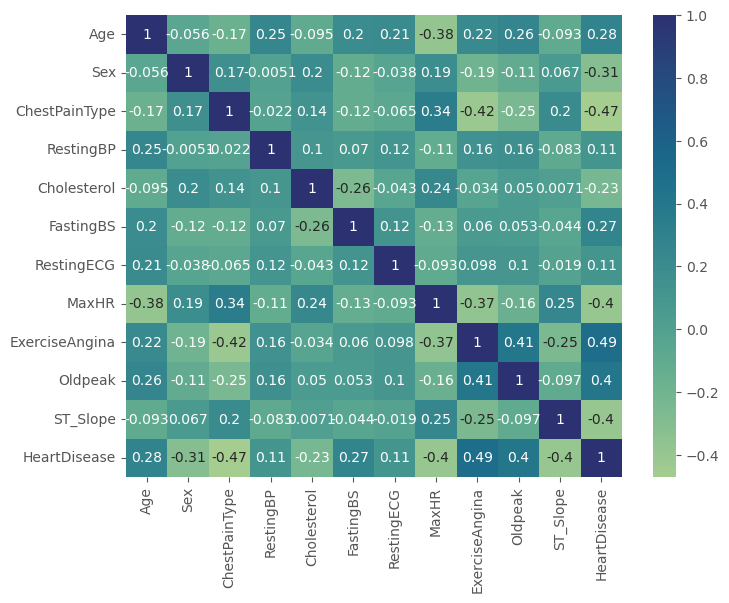

In [9]:
matriz_corr = df.corr(numeric_only=True)
sns.heatmap(matriz_corr,annot=True,cmap="crest")

Utiliza-se a matriz de correção para visualizar a relação entre os atributos preditivos.

In [10]:
#divisão dos dados em conjunto de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(df.drop('HeartDisease',axis=1),df['HeartDisease'],test_size=0.3,random_state=2)

###Verificação da forma dos dados:

In [11]:
X_train.shape,X_test.shape

((642, 11), (276, 11))

In [12]:
y_train.shape,y_test.shape

((642,), (276,))

###Inicialização do classificador.

In [13]:
clf = DecisionTreeClassifier(random_state=2)

Parâmetros do classificador:


*   Criterion: medida de qualidade da divisão
*   splitter: estratégia utilizada para dividir o nó de decisão


*   Max_depth: profundidade máxima da árvore
*   Min_samples_split: número de amostras mínimas para conseiderar um nó para a divisão

*   min_samples_leaf:número de amostras mínimas no nível folha


Inicialmente, utiliza-se o classificador com os valores padrões.






### Treinamento da árvore de decisão:

In [14]:
clf = clf.fit(X_train,y_train)

#### Análise sobre quais atributos mais são importantes para o modelo:



In [15]:
clf.feature_importances_

array([0.05240904, 0.02373617, 0.1295411 , 0.05526431, 0.08789738,
       0.01611761, 0.02360985, 0.13108692, 0.00439296, 0.13154791,
       0.34439676])

In [16]:
for feature,importancia in zip(df,clf.feature_importances_):
    print('{}:{}'.format(feature,importancia))

Age:0.052409041767184014
Sex:0.023736168792799547
ChestPainType:0.1295411019987275
RestingBP:0.055264305093382295
Cholesterol:0.08789738420779133
FastingBS:0.016117613045530166
RestingECG:0.02360984813083013
MaxHR:0.13108691562600758
ExerciseAngina:0.00439295551060546
Oldpeak:0.13154790875685726
ST_Slope:0.34439675707028466


Os atributos "ST_Stope", "Oldpeak" e "MaxHR" são os mais importantes para o modelo. Por outro lado, os atributos "Sex", "FastingBS" e "ExerciseAngina" apresentam menor relevância.

#### Avaliação da perfomance do modelo.

A performance é inicialmente avaliada com base na validação cruzada k-fold com a divisão em 10 subconjuntos.

In [17]:
score_val_cruzada_1 = cross_val_score(clf, X_train, y_train, cv=10)
np.mean(score_val_cruzada_1) * 100

82.55769230769229

A acurácia média obtida para o modelo com a validação cruzada 10-fold é de 82,56%.

In [18]:
resultado = clf.predict(X_test)

In [19]:
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       133
           1       0.77      0.85      0.81       143

    accuracy                           0.79       276
   macro avg       0.80      0.79      0.79       276
weighted avg       0.80      0.79      0.79       276



No modelo padrão foi identificado uma precisão de 82% para pacientes saudáveis e 77% para o pacientes doentes.

Já quanto o *recall*, ou taxa de verdadeiros, obtivemos 73% para pacientes saudáveis e 85% para pacientes doentes.

Sobre o f1-score, métrica que combina precisão e *recall*, obtém-se 77% e 81%.



Para realizar comparações de perfomance, utiliza-se o Classificador Dummy no conjunto de dados como forma de estabelecer um desempenho base.

In [20]:
dummy_clf = DummyClassifier(random_state=2)
dummy_clf.fit(X_train,y_train)

DummyClassifier(random_state=2)

In [21]:
score_val_cruzada_dummy = cross_val_score(dummy_clf, X_train, y_train, cv=10)
np.mean(score_val_cruzada_dummy) * 100

56.85336538461539

A acurácia média obtida para o modelo dummy com a validação cruzada 10-fold é de 56.85%. Portanto, o modelo padrão da árvore de decisão da biblioteca *scikit-learn* é sigficativamente melhor que o classificador dummy.

#### Visualizando a árvore de forma gráfica

In [22]:
!pip3 install graphviz
!pip3 install pydot

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [23]:
import pydot
import graphviz

In [24]:
dot = export_graphviz(clf, out_file=None,
                           feature_names=list(X_train.columns),
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot)
graph.view("arvore_original")

'arvore_original.pdf'

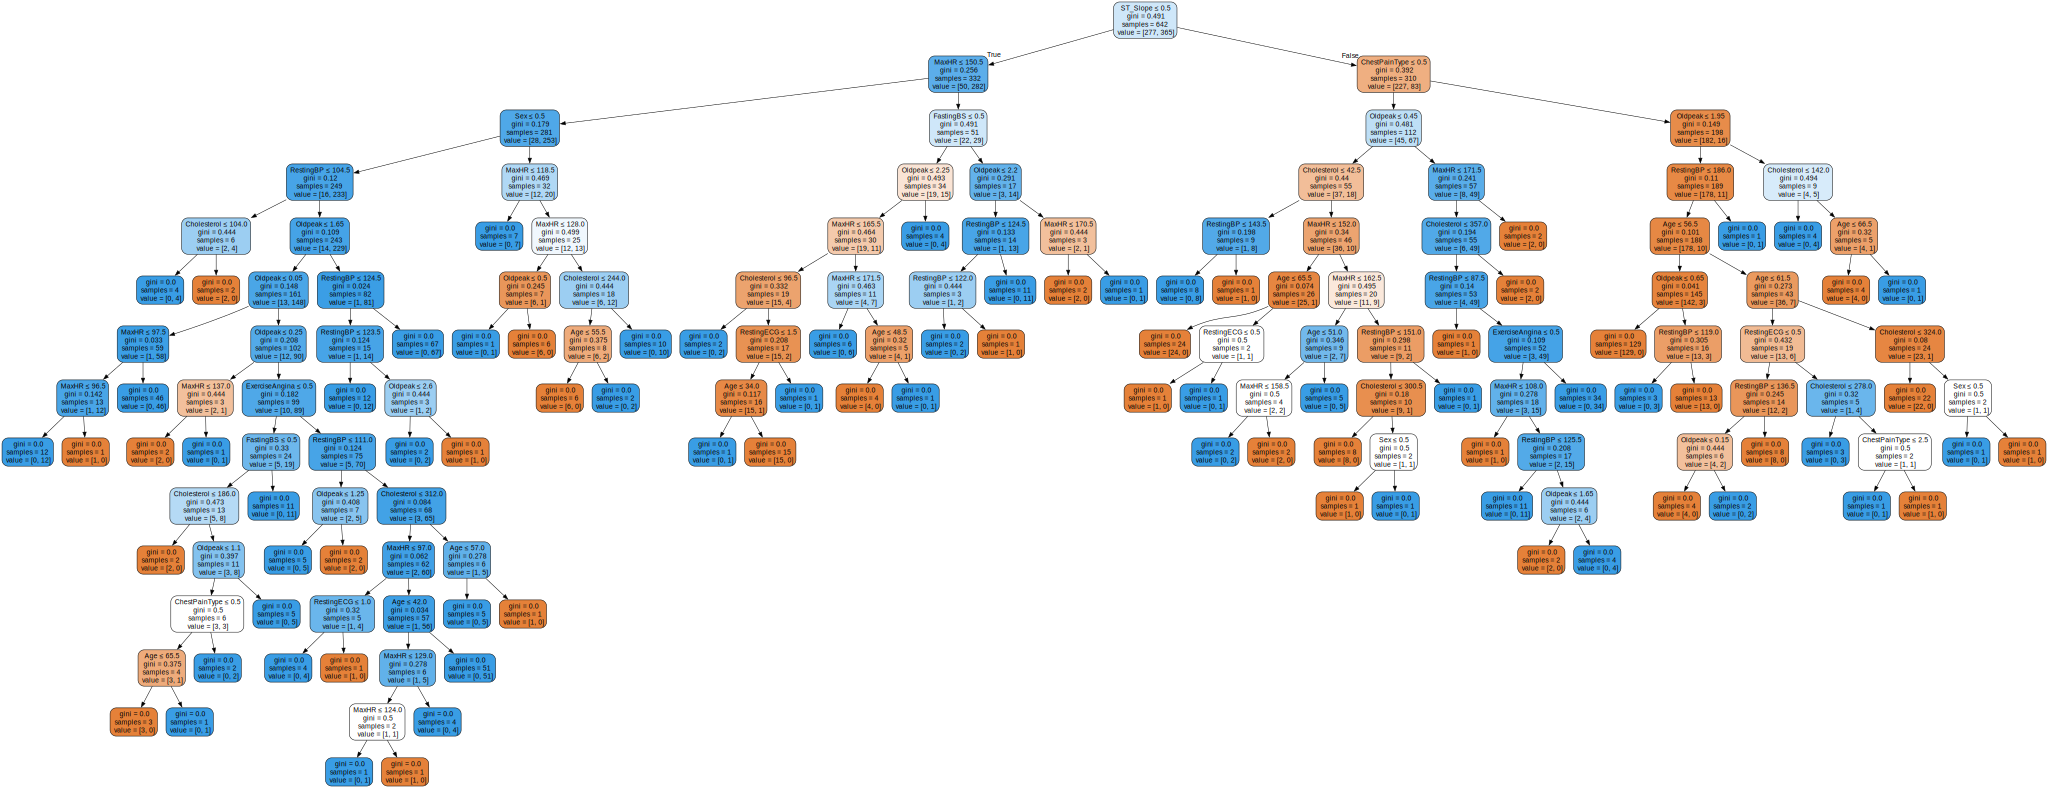

In [25]:
graph

A árvore de decisão obtida com a configuração padrão da biblioteca scikit-learn é exibida acima. O modelo padrão tende a ser especializado no conjunto de dados relativo ao treinamento.

### Otimização do modelo com ajuste nos hiperparâmetros.

Utiliza-se a função GridSearchCV do scikit-learn para otimizar a profundidade máxima da árvore e o número de amostras mínimas para conseiderar um nó para a divisão.

In [26]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 9, 10, 12, 14, None],
    'min_samples_split': [2, 3, 4, 5, 8, 10]
}

grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Hiperparâmetros que resultam na acucária máxima: ", grid_search.best_params_)
print("Acucária máxima: {:.2f}%".format(grid_search.best_score_ * 100))

Hiperparâmetros que resultam na acucária máxima:  {'max_depth': 6, 'min_samples_split': 3}
Acucária máxima: 85.20%


Os hiperparâmetros que otimizam o classificador são 'max_depth' = 6 e 'min_samples_split'= 3.

In [27]:
clf_otimizado = DecisionTreeClassifier(random_state=2, max_depth=6, min_samples_split=3)

In [28]:
clf_otimizado.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=3, random_state=2)

In [29]:
score_val_cruzada_1 = cross_val_score(clf_otimizado, X_train, y_train, cv=10)
np.mean(score_val_cruzada_1) * 100

85.20432692307693

Após otimizações, a acucária obtida para a árvore de decisão na validação cruzada sobe para 85,20%.

In [30]:
y_pred = clf_otimizado.predict(X_test)

In [31]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78       133
           1       0.78      0.83      0.80       143

    accuracy                           0.79       276
   macro avg       0.79      0.79      0.79       276
weighted avg       0.79      0.79      0.79       276



No modelo otimizado foi identificado uma precisão de 80% para pacientes saudáveis e 78% para o pacientes doentes.

Já quanto o *recall*, ou taxa de verdadeiros, obtivemos 75% para pacientes saudáveis e 83% para pacientes doentes.

Sobre o f1-score, métrica que combina precisão e *recall*, obtém-se 78% e 80%.



In [32]:
dot_otimizado = export_graphviz(clf_otimizado, out_file=None,
                           feature_names=list(X_train.columns),
                           filled=True, rounded=True,
                           special_characters=True)
graph_otimizado = graphviz.Source(dot_otimizado)
graph_otimizado.view("arvore_otimizada")

'arvore_otimizada.pdf'

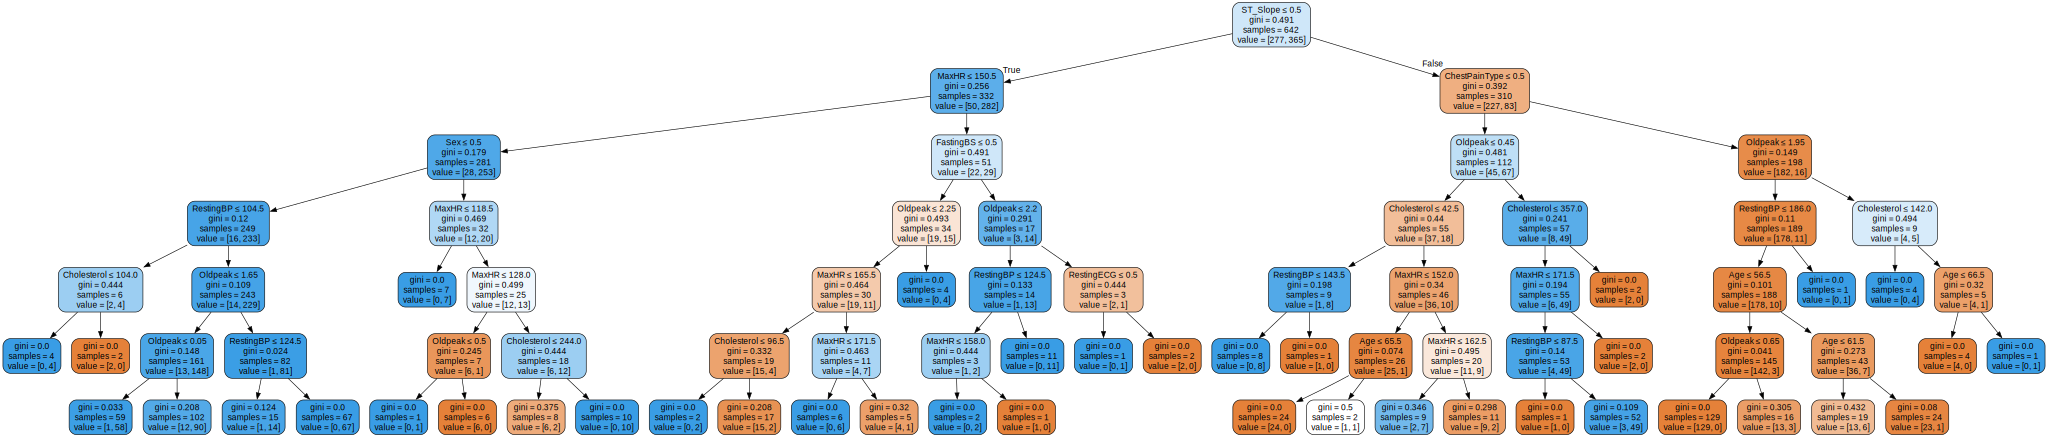

In [33]:
graph_otimizado

A árvore de decisão otimizada apresenta uma estrutura mais simples que o modelo original. Dessa forma, o classificador com as otimizações apresenta uma melhor capacidade de generalização.

Conclusão: A árvore de decisão mostrou-se útil para a classificação de pacientes com doenças cardiácas, uma vez que a acucária obtida na validão cruzada 10-fold foi de 85,20%. Para evitar o sobreajuste do modelo foi realizado uma redução na profundidade máxima da árvore e no número de amostras mínimas para considerar um nó para a divisão.

Para trabalhos futuros, a única árvore de decisão pode ser substituída por um modelo *random forest* com a finalidade de aumentar a acúracia de classificação.